In [615]:
import numpy as np
import pandas as pd
import re

In [616]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [617]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [618]:
df.isnull().sum()

property_type         2
society               3
sector                0
price                20
price_per_sqft       20
area                 20
areaWithType          2
bedRoom               2
bathroom              2
balcony               2
additionalRoom        2
floorNum             21
facing             1107
agePossession         3
nearbyLocations     179
furnishDetails      983
features            637
dtype: int64

In [619]:
df.drop_duplicates(inplace=True)

In [620]:
df.head()
#Will focus on areaWithType,additionalRoom,agePossession,furnishDetails,features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park,sohna road,0.55,7355.0,748.0,Carpet area: 745 (69.21 sq.m.),2.0,2.0,3,not available,4.0,East,0 to 1 Year Old,"['Sector 55-56 metro', 'Global city centre', '...","['1 Bed', '1 Fan', '1 Sofa', '1 Microwave', '1...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
1,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,not available,4.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Soh...","['10 Wardrobe', '1 Water Purifier', '5 Fan', '...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
2,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,"pooja room,servant room",4.0,North-West,0 to 1 Year Old,"['Sapphire 83 Mall', 'Dwarka expressway', 'Del...","['4 Wardrobe', '5 Fan', '3 Geyser', '4 Light',...",NaN
3,flat,la vida by tata housing,sector 113,1.45,11363.0,1276.0,Super Built up area 1276(118.54 sq.m.)Carpet a...,2.0,2.0,2,not available,6.0,South,1 to 5 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajg...","['1 Stove', '2 AC', '1 Modular Kitchen', '1 Ch...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
4,flat,dlf new town heights,sector 90,1.90,5683.0,3343.0,Super Built up area 2727(253.35 sq.m.),4.0,4.0,3+,"pooja room,servant room",7.0,North-West,1 to 5 Year Old,"['Manish Gallexie 91', 'NH-8 IMT Manesar', 'RH...",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."


In [621]:
#1. AreawithType
df.head(10)['areaWithType'][9]

'Super Built up area 2364(219.62 sq.m.)Built Up area: 2362 sq.ft. (219.44 sq.m.)Carpet area: 2360 sq.ft. (219.25 sq.m.)'

In [622]:
# Function to extract super built up area
def get_super_built_up_area(text):
    if isinstance(text, str):  # Check if the input is a string
        match = re.search(r'Super Built up area (\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
    return None

In [623]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    if isinstance(text, str): 
        match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
    return None

In [624]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
        if isinstance(text, str): 
            match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
            if match:
                    sq_m_value = float(match.group(1))
                    return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [625]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(lambda x: get_super_built_up_area(str(x)) if not pd.isnull(x) else None)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(str(x['areaWithType']), x['super_built_up_area']) if not pd.isnull(x['super_built_up_area']) else None, axis=1)

#Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(str(x),'Built Up area') if not pd.isnull(x) else None)
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area'])if not pd.isnull(x['super_built_up_area']) else None, axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(str(x),'Carpet area') if not pd.isnull(x) else None)
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area'])if not pd.isnull(x['super_built_up_area']) else None, axis=1)

In [626]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3787,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
2514,0.40,flat,900.0,Super Built up area 900(83.61 sq.m.)Carpet are...,900.0,NaN,587.0
2618,2.98,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
2909,0.54,flat,845.0,Super Built up area 845.3(78.53 sq.m.)Carpet a...,845.3,NaN,528.3
1526,0.41,flat,662.0,Built Up area: 670 (62.25 sq.m.)Carpet area: 5...,NaN,NaN,NaN


In [627]:
df.duplicated().sum()

0

In [628]:
df[df['areaWithType'].str.contains('Plot', na=False)][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,1.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN
6,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
10,1.50,house,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 210 ...,NaN,NaN,NaN
33,2.47,house,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,NaN,NaN,NaN
40,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,NaN,NaN


In [629]:
df.isnull().sum()

property_type             2
society                   3
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              2
bedRoom                   2
bathroom                  2
balcony                   2
additionalRoom            2
floorNum                 21
facing                 1050
agePossession             3
nearbyLocations         172
furnishDetails          948
features                601
super_built_up_area    1807
built_up_area          3104
carpet_area            2731
dtype: int64

In [630]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape


(531, 7)

In [631]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [632]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.55,flat,748.0,Carpet area: 745 (69.21 sq.m.),NaN,NaN,NaN
2,1.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN
6,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
7,1.75,house,2800.0,Carpet area: 2800 (260.13 sq.m.),NaN,NaN,NaN
10,1.50,house,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 210 ...,NaN,NaN,NaN


In [633]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    if isinstance(area_with_type, str):
        match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
        return float(match.group(1)) if match else None

In [634]:
all_nan_df['built_up_area']= all_nan_df['areaWithType'].apply(extract_plot_area)

In [635]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.55,flat,748.0,Carpet area: 745 (69.21 sq.m.),NaN,NaN,NaN
2,1.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,240.00,NaN
6,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,550.00,NaN
7,1.75,house,2800.0,Carpet area: 2800 (260.13 sq.m.),NaN,NaN,NaN
10,1.50,house,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 210 ...,NaN,162.00,NaN
11,0.52,flat,645.0,Carpet area: 645 (59.92 sq.m.),NaN,NaN,NaN
17,6.50,house,3240.0,Built Up area: 360 (301.01 sq.m.)Carpet area: ...,NaN,NaN,NaN
19,1.27,flat,1299.0,Carpet area: 1304 (121.15 sq.m.),NaN,NaN,NaN
22,8.50,flat,3950.0,Built Up area: 3950 (366.97 sq.m.),NaN,NaN,NaN
32,0.70,flat,1260.0,Built Up area: 140 (117.06 sq.m.),NaN,NaN,NaN


In [636]:
#To get everything into sqft
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [637]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)


In [638]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.55,flat,748.0,Carpet area: 745 (69.21 sq.m.),NaN,NaN,NaN
2,1.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.00,NaN
6,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,4950.00,NaN
7,1.75,house,2800.0,Carpet area: 2800 (260.13 sq.m.),NaN,NaN,NaN
10,1.50,house,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 210 ...,NaN,1458.00,NaN
11,0.52,flat,645.0,Carpet area: 645 (59.92 sq.m.),NaN,NaN,NaN
17,6.50,house,3240.0,Built Up area: 360 (301.01 sq.m.)Carpet area: ...,NaN,NaN,NaN
19,1.27,flat,1299.0,Carpet area: 1304 (121.15 sq.m.),NaN,NaN,NaN
22,8.50,flat,3950.0,Built Up area: 3950 (366.97 sq.m.),NaN,NaN,NaN
32,0.70,flat,1260.0,Built Up area: 140 (117.06 sq.m.),NaN,NaN,NaN


In [639]:
# update the original dataframe
df.update(all_nan_df)

In [640]:
df.isnull().sum()

property_type             2
society                   3
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              2
bedRoom                   2
bathroom                  2
balcony                   2
additionalRoom            2
floorNum                 21
facing                 1050
agePossession             3
nearbyLocations         172
furnishDetails          948
features                601
super_built_up_area    1807
built_up_area          2423
carpet_area            2731
dtype: int64

In [641]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global park,sohna road,0.55,7355.0,748.0,Carpet area: 745 (69.21 sq.m.),2.0,2.0,3,not available,4.0,East,0 to 1 Year Old,"['Sector 55-56 metro', 'Global city centre', '...","['1 Bed', '1 Fan', '1 Sofa', '1 Microwave', '1...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,NaN,NaN
1,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,not available,4.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Soh...","['10 Wardrobe', '1 Water Purifier', '5 Fan', '...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1450.0,NaN,1177.00
2,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,"pooja room,servant room",4.0,North-West,0 to 1 Year Old,"['Sapphire 83 Mall', 'Dwarka expressway', 'Del...","['4 Wardrobe', '5 Fan', '3 Geyser', '4 Light',...",NaN,NaN,2160.0,NaN
3,flat,la vida by tata housing,sector 113,1.45,11363.0,1276.0,Super Built up area 1276(118.54 sq.m.)Carpet a...,2.0,2.0,2,not available,6.0,South,1 to 5 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajg...","['1 Stove', '2 AC', '1 Modular Kitchen', '1 Ch...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1276.0,NaN,904.01
4,flat,dlf new town heights,sector 90,1.90,5683.0,3343.0,Super Built up area 2727(253.35 sq.m.),4.0,4.0,3+,"pooja room,servant room",7.0,North-West,1 to 5 Year Old,"['Manish Gallexie 91', 'NH-8 IMT Manesar', 'RH...",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",2727.0,NaN,NaN


In [642]:
#2.Additional Room
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1516
servant room                                      688
study room                                        243
others                                            219
pooja room                                        164
store room                                         97
study room,servant room                            97
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                55
pooja room,study room,servant room,others          54
pooja room,study room,servant room                 53
servant room,pooja room                            38
servant room,store room                            31
study room,others                                  26
pooja room,study room                              21
pooja room,others                                  16
pooja room,store room                              15
servant room,

In [643]:
#Creating Additional Columns
new_cols = ['study room','servant room','pooja room','store room','others']

for col in new_cols:
   df[col]= df['additionalRoom'].str.contains(col,na=False).astype(int)

In [644]:
df.sample(5)[['study room','servant room','pooja room','store room','others']]

,study room,servant room,pooja room,store room,others
376,0,0,0,0,0
3578,0,1,0,0,1
195,0,0,0,0,0
1137,0,0,1,0,0
3277,0,1,1,0,0


In [645]:
#3. AgePosession
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1646
5 to 10 Year Old       563
0 to 1 Year Old        503
undefined              307
10+ Year Old           303
Under Construction      88
Within 6 months         67
Within 3 months         24
Dec-23                  18
By 2023                 17
By 2024                 16
Dec-24                  14
Mar-24                  12
Dec-25                   7
Jan-24                   6
Aug-23                   6
Nov-23                   5
Jun-24                   5
Oct-24                   5
Sep-23                   4
By 2025                  4
Aug-24                   4
May-24                   3
Nov-24                   3
Jul-24                   3
Jan-25                   3
Feb-24                   3
Oct-23                   3
Jun 2024                 2
Sep-25                   2
Jul-25                   2
Dec-26                   2
Jun-27                   2
Apr-26                   2
Mar-25                   2
Jul-27                   2
Aug-25        

In [646]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [647]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [648]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           594
Moderately Old         563
Undefined              442
Old Property           303
Under Construction     135
Name: count, dtype: int64

In [649]:
#4.Furnished Details
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2918,"['5 Fan', '1 Exhaust Fan', '3 Geyser', '12 Lig...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
2872,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
73,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
2497,"['13 Fan', '17 Light', '1 Modular Kitchen', 'N...","['Maintenance Staff', 'False Ceiling Lighting'..."
3059,"['4 Fan', '1 Exhaust Fan', '1 Geyser', '4 Ligh...","['Centrally Air Conditioned', 'Water purifier'..."


In [650]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails','features'] + columns_to_include]

In [651]:
furnishings_df.shape

(3683, 20)

In [652]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_80096/114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [653]:
furnishings_df.sample(5)


,features,Sofa,TV,Dining Table,AC,Chimney,Bed,Washing Machine,Water Purifier,Wardrobe,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan
312,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2432,"['Feng Shui / Vaastu Compliant', 'Private Gard...",0,0,0,5,1,0,1,1,5,1,1,5,0,1,1,5,1,4
1330,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",1,1,1,2,0,2,0,1,2,0,0,3,0,1,0,6,1,4
3352,"['Feng Shui / Vaastu Compliant', 'Private Gard...",0,0,0,0,0,0,0,0,6,0,0,0,0,1,0,24,1,0
1866,"['Power Back-up', 'Feng Shui / Vaastu Complian...",0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [654]:
#doing Kmeans Clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [685]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

ValueError: could not convert string to float: "['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

In [ ]:
# Plot the results
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [ ]:
df = df.iloc[:,:-18]

In [ ]:
df['furnishing_type'] = cluster_assignments

In [ ]:
print(df.columns)


In [689]:
#5.Features
df[['society','features']].sample(5)


,society,features
3783,vipul lavanya,"['High Ceiling Height', 'False Ceiling Lightin..."
3607,sare crescent parc,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M..."
51,sare crescent parc,"['Security / Fire Alarm', 'Lift(s)', 'Maintena..."
3424,ambience creacions,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
942,independent,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."


In [691]:
df['features'].isnull().sum()

601

In [697]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [701]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [715]:
temp_df = df[df['features'].isnull()]

In [719]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [721]:
df.loc[temp_df.index,'features'] = x.values

In [723]:
df['features'].isnull().sum()


459

In [725]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [727]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [729]:
features_binary_df.sample(5)


,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2046,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3630,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
1817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3579,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [731]:
features_binary_df.shape


(3683, 130)

In [733]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

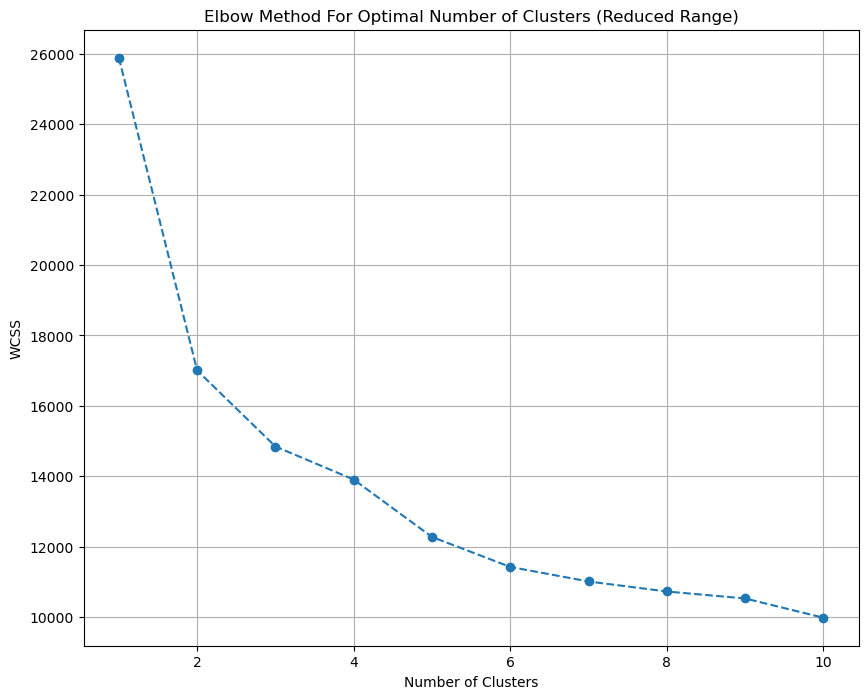

In [737]:
# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [751]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [753]:
df['luxury_score'] = luxury_score


In [755]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,Sofa,TV,Dining Table,AC,Chimney,Bed,Washing Machine,Water Purifier,Wardrobe,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
0,flat,signature global park,sohna road,0.55,7355.0,748.0,Carpet area: 745 (69.21 sq.m.),2.0,2.0,3,4.0,East,New Property,NaN,NaN,NaN,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,80.0
1,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,0,0,0,4,1,0,0,1,10,1,0,2,0,0,1,33,0,5,97.0
2,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,4.0,North-West,New Property,NaN,2160.0,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,4,0,0,3,0,0,0,4,0,5,0.0
3,flat,la vida by tata housing,sector 113,1.45,11363.0,1276.0,Super Built up area 1276(118.54 sq.m.)Carpet a...,2.0,2.0,2,6.0,South,Relatively New,1276.0,NaN,904.01,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,80.0
4,flat,dlf new town heights,sector 90,1.90,5683.0,3343.0,Super Built up area 2727(253.35 sq.m.),4.0,4.0,3+,7.0,North-West,Relatively New,2727.0,NaN,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.0


In [745]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [747]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,Sofa,TV,Dining Table,AC,Chimney,Bed,Washing Machine,Water Purifier,Wardrobe,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
371,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,215.0,NaN,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,28,0,12,79.0
2270,flat,sare crescent parc royal greens phase 1,sector 92,0.65,4512.0,1441.0,Super Built up area 1440.45(133.82 sq.m.),3.0,3.0,3,1.0,East,Moderately Old,1440.45,NaN,NaN,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,1,0,0,0,6,103.0
2586,flat,m3m woodshire,sector 107,0.82,6002.0,1366.0,Super Built up area 1366(126.91 sq.m.),2.0,2.0,3+,7.0,North-East,Relatively New,1366.00,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67.0
920,flat,bptp freedom park life,sector 57,2.50,11111.0,2250.0,Super Built up area 2250(209.03 sq.m.),3.0,3.0,3,9.0,NaN,Moderately Old,2250.00,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.0
2992,flat,emaar palm gardens,sector 83,1.76,9263.0,1900.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3.0,3.0,3,6.0,North-West,Relatively New,1900.00,1500.0,1240.0,0,1,0,0,0,0,0,0,3,1,0,0,0,3,1,0,3,0,0,0,10,0,6,174.0


In [749]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)